# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [85]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
    

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:

new_response_list = []
for response in response_json:
    if response['cod'] == '404':
        print ('404')
    else:
        count += 1
        print (response)
        new_response_list.append(response)  


{'coord': {'lon': 84.87, 'lat': 47.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 287.4, 'pressure': 1022.05, 'humidity': 39, 'temp_min': 287.4, 'temp_max': 287.4, 'sea_level': 1022.05, 'grnd_level': 923.5}, 'wind': {'speed': 1.32, 'deg': 318.467}, 'clouds': {'all': 10}, 'dt': 1557202223, 'sys': {'message': 0.0051, 'country': 'KZ', 'sunrise': 1557183325, 'sunset': 1557236325}, 'id': 1517060, 'name': 'Zaysan', 'cod': 200}
{'coord': {'lon': 80.68, 'lat': 7.35}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.2, 'pressure': 1011.17, 'humidity': 65, 'temp_min': 301.2, 'temp_max': 301.2, 'sea_level': 1011.17, 'grnd_level': 980.64}, 'wind': {'speed': 2.86, 'deg': 223.938}, 'clouds': {'all': 47}, 'dt': 1557202223, 'sys': {'message': 0.0045, 'country': 'LK', 'sunrise': 1557188489, 'sunset': 1557233172}, 'id': 1241622, 'name': 'W

{'coord': {'lon': -62.99, 'lat': -40.81}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.6, 'pressure': 1022.19, 'humidity': 61, 'temp_min': 284.6, 'temp_max': 284.6, 'sea_level': 1022.19, 'grnd_level': 1019.04}, 'wind': {'speed': 4.34, 'deg': 22.247}, 'clouds': {'all': 0}, 'dt': 1557202090, 'sys': {'message': 0.0045, 'country': 'AR', 'sunrise': 1557227050, 'sunset': 1557263571}, 'id': 3832899, 'name': 'Viedma', 'cod': 200}
{'coord': {'lon': -38.52, 'lat': -3.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.89, 'pressure': 1011, 'humidity': 83, 'temp_min': 298.71, 'temp_max': 299.15}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1557202089, 'sys': {'type': 1, 'id': 8363, 'message': 0.005, 'country': 'BR', 'sunrise': 1557217899, 'sunset': 1557260976}, 'id': 6320062, 'name': 'Fortaleza', 'c

In [91]:
len(new_response_list)


561

In [92]:
response_json = [];
url = "http://api.openweathermap.org/data/2.5/weather?q="
print(f"Beginning Data Retrieval")
print(f"---------------------------")

# Make a request for each of the indices
for x in range(len(new_response_list)):
    print(f"Processing Record {x} | {cities[x]}")

    # Get one of the posts
    post_response = requests.get(url + cities[x] + "&APPID=" + api_key)
    print("this is the json {}".format(post_response))
    print ("this is the requests status code".format(post_response.status_code))
    # Save post's JSON
    response_json.append(post_response.json())


Beginning Data Retrieval
---------------------------
Processing Record 0 | caravelas
this is the json <Response [200]>
this is the requests status code
Processing Record 1 | kapaa
this is the json <Response [200]>
this is the requests status code
Processing Record 2 | ushuaia
this is the json <Response [200]>
this is the requests status code
Processing Record 3 | kodiak
this is the json <Response [200]>
this is the requests status code
Processing Record 4 | sandwick
this is the json <Response [200]>
this is the requests status code
Processing Record 5 | dustlik
this is the json <Response [200]>
this is the requests status code
Processing Record 6 | ilulissat
this is the json <Response [200]>
this is the requests status code
Processing Record 7 | saint-philippe
this is the json <Response [200]>
this is the requests status code
Processing Record 8 | mnogovershinnyy
this is the json <Response [200]>
this is the requests status code
Processing Record 9 | puerto madryn
this is the json <Res

this is the json <Response [200]>
this is the requests status code
Processing Record 83 | kavaratti
this is the json <Response [200]>
this is the requests status code
Processing Record 84 | tiarei
this is the json <Response [200]>
this is the requests status code
Processing Record 85 | iqaluit
this is the json <Response [200]>
this is the requests status code
Processing Record 86 | kaitangata
this is the json <Response [200]>
this is the requests status code
Processing Record 87 | ribeira grande
this is the json <Response [200]>
this is the requests status code
Processing Record 88 | provideniya
this is the json <Response [200]>
this is the requests status code
Processing Record 89 | severnoye
this is the json <Response [200]>
this is the requests status code
Processing Record 90 | oussouye
this is the json <Response [200]>
this is the requests status code
Processing Record 91 | carnarvon
this is the json <Response [200]>
this is the requests status code
Processing Record 92 | sisimiut

this is the json <Response [200]>
this is the requests status code
Processing Record 165 | zinder
this is the json <Response [200]>
this is the requests status code
Processing Record 166 | sesheke
this is the json <Response [200]>
this is the requests status code
Processing Record 167 | mandan
this is the json <Response [200]>
this is the requests status code
Processing Record 168 | peleduy
this is the json <Response [200]>
this is the requests status code
Processing Record 169 | broken hill
this is the json <Response [200]>
this is the requests status code
Processing Record 170 | vardo
this is the json <Response [200]>
this is the requests status code
Processing Record 171 | jieshi
this is the json <Response [200]>
this is the requests status code
Processing Record 172 | berlevag
this is the json <Response [200]>
this is the requests status code
Processing Record 173 | bontang
this is the json <Response [200]>
this is the requests status code
Processing Record 174 | yellowknife
this i

this is the json <Response [200]>
this is the requests status code
Processing Record 247 | victor harbor
this is the json <Response [200]>
this is the requests status code
Processing Record 248 | nouadhibou
this is the json <Response [200]>
this is the requests status code
Processing Record 249 | sembe
this is the json <Response [404]>
this is the requests status code
Processing Record 250 | ust-bolsheretsk
this is the json <Response [404]>
this is the requests status code
Processing Record 251 | beringovskiy
this is the json <Response [200]>
this is the requests status code
Processing Record 252 | tuktoyaktuk
this is the json <Response [200]>
this is the requests status code
Processing Record 253 | vincennes
this is the json <Response [200]>
this is the requests status code
Processing Record 254 | saint george
this is the json <Response [200]>
this is the requests status code
Processing Record 255 | mattru
this is the json <Response [200]>
this is the requests status code
Processing R

this is the json <Response [200]>
this is the requests status code
Processing Record 328 | gossaigaon
this is the json <Response [200]>
this is the requests status code
Processing Record 329 | russellville
this is the json <Response [200]>
this is the requests status code
Processing Record 330 | porto velho
this is the json <Response [200]>
this is the requests status code
Processing Record 331 | yaan
this is the json <Response [200]>
this is the requests status code
Processing Record 332 | micheweni
this is the json <Response [200]>
this is the requests status code
Processing Record 333 | kamenskoye
this is the json <Response [404]>
this is the requests status code
Processing Record 334 | sibolga
this is the json <Response [200]>
this is the requests status code
Processing Record 335 | kanigoro
this is the json <Response [200]>
this is the requests status code
Processing Record 336 | victoria
this is the json <Response [200]>
this is the requests status code
Processing Record 337 | ri

this is the json <Response [200]>
this is the requests status code
Processing Record 411 | bodden town
this is the json <Response [200]>
this is the requests status code
Processing Record 412 | carbonia
this is the json <Response [200]>
this is the requests status code
Processing Record 413 | tokur
this is the json <Response [200]>
this is the requests status code
Processing Record 414 | key west
this is the json <Response [200]>
this is the requests status code
Processing Record 415 | nalobikha
this is the json <Response [200]>
this is the requests status code
Processing Record 416 | leh
this is the json <Response [200]>
this is the requests status code
Processing Record 417 | lishan
this is the json <Response [200]>
this is the requests status code
Processing Record 418 | lorengau
this is the json <Response [200]>
this is the requests status code
Processing Record 419 | kalabo
this is the json <Response [200]>
this is the requests status code
Processing Record 420 | phan thiet
this i

this is the json <Response [404]>
this is the requests status code
Processing Record 493 | brza palanka
this is the json <Response [200]>
this is the requests status code
Processing Record 494 | dandong
this is the json <Response [200]>
this is the requests status code
Processing Record 495 | xichang
this is the json <Response [200]>
this is the requests status code
Processing Record 496 | ahipara
this is the json <Response [200]>
this is the requests status code
Processing Record 497 | imphal
this is the json <Response [200]>
this is the requests status code
Processing Record 498 | scarborough
this is the json <Response [200]>
this is the requests status code
Processing Record 499 | zavyalovo
this is the json <Response [200]>
this is the requests status code
Processing Record 500 | azimur
this is the json <Response [404]>
this is the requests status code
Processing Record 501 | ngunguru
this is the json <Response [200]>
this is the requests status code
Processing Record 502 | nurota
t

In [35]:
response_json

[{'coord': {'lon': 84.87, 'lat': 47.47},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 287.4,
   'pressure': 1022.05,
   'humidity': 39,
   'temp_min': 287.4,
   'temp_max': 287.4,
   'sea_level': 1022.05,
   'grnd_level': 923.5},
  'wind': {'speed': 1.32, 'deg': 318.467},
  'clouds': {'all': 10},
  'dt': 1557202223,
  'sys': {'message': 0.0051,
   'country': 'KZ',
   'sunrise': 1557183325,
   'sunset': 1557236325},
  'id': 1517060,
  'name': 'Zaysan',
  'cod': 200},
 {'coord': {'lon': 80.68, 'lat': 7.35},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 301.2,
   'pressure': 1011.17,
   'humidity': 65,
   'temp_min': 301.2,
   'temp_max': 301.2,
   'sea_level': 1011.17,
   'grnd_level': 980.64},
  'wind': {'speed': 2.86, 'deg': 223.938},
  'clouds': {'all': 47},
  'dt': 1557202223,
  'sys': {'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
from pprint import pprint
#length of the json response
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

#construct and append all json data in the loop and create a dataframe 
for x in range(len(new_response_list)):
   # try:
    city = new_response_list[x]['name']
    City.append(city)
   
   
    clouds = new_response_list[x]['clouds']['all']
    Cloudiness.append(clouds)
    
    country = new_response_list[x]['sys']['country']
    Country.append(country)
    
    date = new_response_list[x]['dt']
    Date.append(date)
    
    humidity = new_response_list[x]['main']['humidity']
    Humidity.append(humidity)
    
    lon = new_response_list[x]['coord']['lon']
    Lng.append(lon)
    
    
    lat = new_response_list[x]['coord']['lat']
    Lat.append(lat)
    
    
    temp_max = new_response_list[x]['main']['temp_max']
    Max_Temp.append(temp_max)
    
    
    wind_speed = new_response_list[x]['wind']['speed']
    Wind_Speed.append(wind_speed)

    #except KeyError:
        #print('key error')

In [101]:
len(new_response_list)

561

In [115]:
#Create dataframe
weather_df = pd.DataFrame()
weather_df['City'] = City
weather_df['Cloudiness'] = Cloudiness
weather_df['Country'] = Country
weather_df['Date'] = Date
weather_df['Humidity'] = Humidity
weather_df['Lat'] = Lat
weather_df['Lng'] = Lng
weather_df['Max_Temp'] = Max_Temp
weather_df['Wind_Speed'] = Wind_Speed

weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Zaysan,10,KZ,1557202223,39,47.47,84.87,287.40,1.32
1,Wattegama,47,LK,1557202223,65,7.35,80.68,301.20,2.86
2,Veraval,0,FR,1557202220,86,49.65,0.71,279.26,2.10
3,Hithadhoo,78,MV,1557202217,72,-0.60,73.08,302.40,3.59
4,Ahmadnagar,0,IN,1557202224,25,19.09,74.75,303.20,4.00
5,Nikolskoye,90,RU,1557202024,87,59.70,30.79,279.15,2.00
6,Jamestown,1,AU,1557202224,47,-33.21,138.60,292.50,8.50
7,Ribeira Grande,75,PT,1557202224,80,38.52,-28.70,289.40,6.87
8,Port Elizabeth,0,US,1557202216,87,39.31,-74.98,286.15,2.60
9,Yulara,0,AU,1557198000,19,-25.24,130.99,297.15,6.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

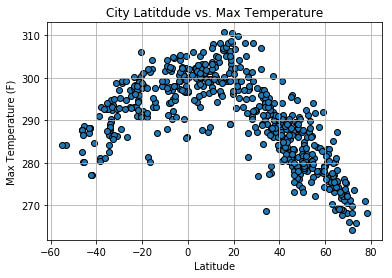

In [116]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max_Temp"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitdude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("LatitdudevsMaxTemperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

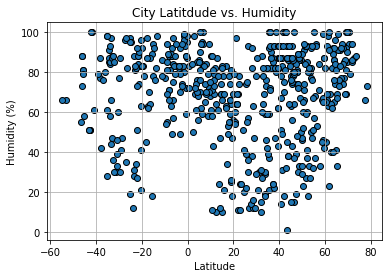

In [110]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitdude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitdudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

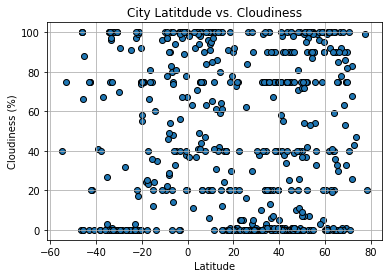

In [111]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitdude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitdudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

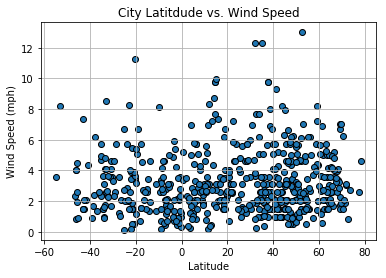

In [112]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind_Speed"], marker="o", edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitdude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitdudevsWind_Speed.png")

# Show plot
plt.show()